# Diferenciación Numérica
La **diferenciación numérica** se ocupa de encontrar el valor aproximado de la derivada de una función en un punto, basándose en los valores de la función en puntos cercanos. Es especialmente útil cuando la función no se conoce analíticamente o su derivada es muy compleja de calcular.

### Fórmulas de Diferencias Finitas

El enfoque más común es usar **fórmulas de diferencias finitas**, que se derivan de la expansión en series de Taylor. Estas fórmulas aproximan la pendiente de la función.

- **Diferencia hacia adelante:** $f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{h}$ (Error $O(h)$)
- **Diferencia hacia atrás:** $f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{h}$ (Error $O(h)$)
- **Diferencia centrada:** $f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2h}$ (Error $O(h^2)$)

**Problema:**
Calcular la derivada de la función $f(x) = \frac{(x + 7)(x + 2)(x - 4)(x - 12)}{100}$ en el punto $x=2$.

In [1]:
from mnspy import Derivada, Richardson
import sympy as sp

In [2]:
# Primero, definimos la función a derivar.
def f(x):
    return (x + 7) * (x + 2) * (x - 4) * (x - 12) / 100

In [3]:
# Usamos la clase `Derivada` para una aproximación de bajo orden.
# El argumento `orden='h'` indica una fórmula con error de orden O(h), adelante.
der = Derivada(f, orden='h', modo='adelante')

In [4]:
# Calculamos la derivada en x=2.
der.derivar(2)
print(f"La derivada aproximada (baja orden) en x=2 es: {der.derivada}")

La derivada aproximada (baja orden) en x=2 es: -1.720999989990979


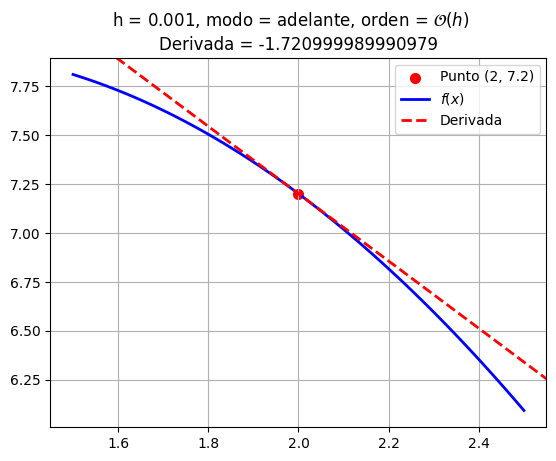

In [5]:
# La gráfica muestra la función y la línea tangente aproximada en el punto.
der.graficar(2,1.5,2.5)

## Extrapolación de Richardson
La **extrapolación de Richardson** es una técnica poderosa para mejorar la precisión de las aproximaciones numéricas. Combina dos estimaciones de la derivada, calculadas con diferentes tamaños de paso (por ejemplo, $h$ y $h/2$), para cancelar los términos de error de orden inferior. Esto resulta en una estimación mucho más precisa.


In [6]:
# Ahora usamos la clase `Richardson` para una aproximación de mayor precisión.
ri = Richardson(f, orden='h')

In [7]:
# Calculamos la derivada en x=2 usando extrapolación.
ri.derivar(2)
print(f"La derivada con extrapolación de Richardson en x=2 es: {ri.derivada}")

La derivada con extrapolación de Richardson en x=2 es: -1.7203333333339899


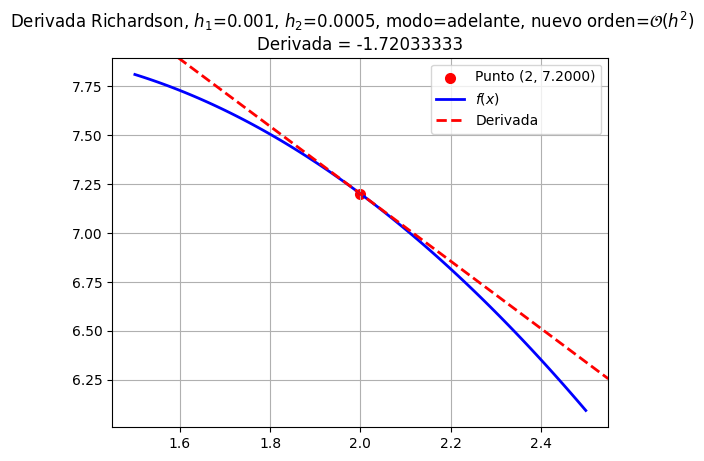

In [8]:
# Graficamos el resultado. La tangente será mucho más precisa.
ri.graficar(2, 1.5, 2.5)

## Verificación con Cálculo Analítico (SymPy)
Para verificar nuestros resultados numéricos, podemos calcular la derivada exacta utilizando cálculo simbólico con la biblioteca `SymPy`.


Función original:


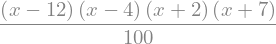

In [9]:
# Definimos la variable simbólica y la función.
x_sym = sp.symbols('x')
f_sym = (x_sym + 7) * (x_sym + 2) * (x_sym - 4) * (x_sym - 12) / 100
print("Función original:")
f_sym

Derivada analítica:


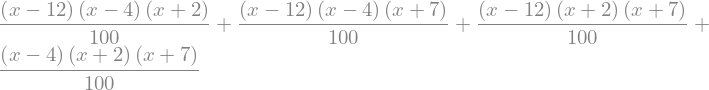

In [10]:
# Calculamos la derivada simbólica.
df_sym = f_sym.diff(x_sym)
print("Derivada analítica:")
df_sym

In [11]:
# Evaluamos la derivada en x=2.
valor_exacto = df_sym.subs(x_sym, 2)
valor_exacto_float = valor_exacto.evalf()
print(f"Valor exacto de la derivada en x=2: {valor_exacto_float}")

Valor exacto de la derivada en x=2: -1.72000000000000


In [12]:
## Comparación de Resultados
print(f"  - Aproximación de baja orden: {der.derivada:.6f}")
print(f"  - Extrapolación de Richardson: {ri.derivada:.6f}")
print(f"  - Valor Analítico Exacto:      {valor_exacto_float:.6f}")

  - Aproximación de baja orden: -1.721000
  - Extrapolación de Richardson: -1.720333
  - Valor Analítico Exacto:      -1.720000


Se puede observar que el resultado de la extrapolación de Richardson es significativamente más cercano al valor exacto que la aproximación de diferencias finitas de bajo orden.